In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset

import matplotlib.image as mpimg
from matplotlib import cm
import matplotlib.animation as ani
from scipy.integrate import odeint
import pandas as pd
import copy

%matplotlib inline

In [104]:
def plot_map(lat, long, para):
    amin = np.amin(para)
    amax = np.amax(para)
    matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
    fig = plt.figure()
    plt.pcolor(long, lat, para, cmap='seismic', vmin=max(abs(amin), abs(amax)), vmax=(-1)*max(abs(amin), abs(amax)))
    plt.tight_layout()
    cbar = plt.colorbar()
    plt.show()

In [69]:
lat = do18_monthly.variables["latitude"][:].data[1:-1]
long = do18_monthly.variables["longitude"][:].data

In [3]:
do18_monthly = Dataset('Data/xnapa.nc')

In [4]:
m = len(do18_monthly.variables["dO18"])
m/2

6911.0

In [5]:
do18_monthly.variables["dO18"]

<class 'netCDF4._netCDF4.Variable'>
float64 dO18(t, level-1_5, latitude, longitude)
    _FillValue: 2.0000000400817547e+20
    missing_value: 2.0000000400817547e+20
unlimited dimensions: t
current shape = (13822, 1, 73, 96)
filling on

In [6]:
do18 = []
for i in range(6900):
    do18.append(do18_monthly.variables["dO18"][i][0].data[1:-1].reshape(71*96))

In [58]:
ar_do18 = np.asarray(do18)

In [92]:
df_do18 = pd.DataFrame(ar_do18)
df_do18

,0,1,2,3,4,5,6,7,8,9,...,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815
0,-25.442968,-25.051138,-24.907070,-25.048481,-24.725521,-24.308638,-23.521463,-22.560457,-22.104445,-21.464165,...,-41.799858,-42.194706,-42.814949,-42.143002,-40.915493,-39.900501,-38.307869,-39.023346,-40.820255,-44.661385
1,-24.934452,-25.195669,-25.093119,-24.903063,-24.774109,-24.216551,-23.586115,-23.150782,-23.040876,-22.744596,...,-32.415913,-35.823463,-42.534306,-35.756607,-38.510662,-42.660519,-45.127674,-54.851513,-59.264618,-54.303188
2,-28.361578,-27.270388,-26.369043,-25.564342,-25.668680,-25.869015,-26.033426,-26.517004,-26.592150,-26.012615,...,-44.504841,-43.525429,-43.553280,-42.625336,-41.332329,-43.345634,-45.034386,-45.327595,-43.992950,-44.422367
3,-33.471279,-32.561378,-32.209591,-31.778326,-31.032484,-29.976816,-29.552757,-29.693619,-29.720911,-29.740414,...,-51.504196,-52.842476,-53.440430,-54.256409,-55.334045,-55.265415,-54.761452,-55.901127,-57.654633,-58.761898
4,-28.628731,-29.980743,-31.112083,-30.723387,-29.940968,-29.617868,-28.652365,-27.171337,-25.689939,-24.473385,...,-50.362717,-49.568626,-50.952938,-53.756882,-53.069695,-53.727753,-54.324158,-54.209679,-53.983295,-55.120640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895,-8.342618,-8.511757,-8.725875,-8.426493,-8.232976,-8.152590,-7.971745,-7.443675,-7.077210,-6.831789,...,-51.511261,-51.799210,-53.596085,-55.451664,-57.054916,-57.884525,-58.526852,-58.601765,-58.945595,-59.638657
6896,-6.081866,-6.004805,-5.736920,-5.758529,-6.071608,-6.472674,-6.828318,-7.181200,-7.089967,-6.764286,...,-61.754078,-62.021347,-62.678787,-64.163361,-65.774673,-66.660286,-67.343338,-67.640900,-67.905640,-68.211693
6897,-12.969124,-13.078371,-13.170824,-13.326189,-13.546698,-13.609559,-13.888052,-14.181713,-14.336896,-14.416568,...,-58.746559,-58.244167,-59.814163,-61.550491,-61.812035,-62.332523,-62.727165,-63.119686,-63.177742,-63.608109
6898,-15.808730,-16.104269,-16.761007,-17.168547,-17.295471,-17.260239,-17.015457,-16.635546,-16.437460,-16.608536,...,-69.017563,-68.364891,-69.146057,-70.110374,-70.789627,-71.239464,-72.106499,-72.841095,-72.897087,-74.553162


In [60]:
l = list(np.arange(0,12))*int(len(df_do18)/12)
df_do18.index = l
df_do18

,0,1,2,3,4,5,6,7,8,9,...,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815
0,-25.442968,-25.051138,-24.907070,-25.048481,-24.725521,-24.308638,-23.521463,-22.560457,-22.104445,-21.464165,...,-41.799858,-42.194706,-42.814949,-42.143002,-40.915493,-39.900501,-38.307869,-39.023346,-40.820255,-44.661385
1,-24.934452,-25.195669,-25.093119,-24.903063,-24.774109,-24.216551,-23.586115,-23.150782,-23.040876,-22.744596,...,-32.415913,-35.823463,-42.534306,-35.756607,-38.510662,-42.660519,-45.127674,-54.851513,-59.264618,-54.303188
2,-28.361578,-27.270388,-26.369043,-25.564342,-25.668680,-25.869015,-26.033426,-26.517004,-26.592150,-26.012615,...,-44.504841,-43.525429,-43.553280,-42.625336,-41.332329,-43.345634,-45.034386,-45.327595,-43.992950,-44.422367
3,-33.471279,-32.561378,-32.209591,-31.778326,-31.032484,-29.976816,-29.552757,-29.693619,-29.720911,-29.740414,...,-51.504196,-52.842476,-53.440430,-54.256409,-55.334045,-55.265415,-54.761452,-55.901127,-57.654633,-58.761898
4,-28.628731,-29.980743,-31.112083,-30.723387,-29.940968,-29.617868,-28.652365,-27.171337,-25.689939,-24.473385,...,-50.362717,-49.568626,-50.952938,-53.756882,-53.069695,-53.727753,-54.324158,-54.209679,-53.983295,-55.120640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,-8.342618,-8.511757,-8.725875,-8.426493,-8.232976,-8.152590,-7.971745,-7.443675,-7.077210,-6.831789,...,-51.511261,-51.799210,-53.596085,-55.451664,-57.054916,-57.884525,-58.526852,-58.601765,-58.945595,-59.638657
8,-6.081866,-6.004805,-5.736920,-5.758529,-6.071608,-6.472674,-6.828318,-7.181200,-7.089967,-6.764286,...,-61.754078,-62.021347,-62.678787,-64.163361,-65.774673,-66.660286,-67.343338,-67.640900,-67.905640,-68.211693
9,-12.969124,-13.078371,-13.170824,-13.326189,-13.546698,-13.609559,-13.888052,-14.181713,-14.336896,-14.416568,...,-58.746559,-58.244167,-59.814163,-61.550491,-61.812035,-62.332523,-62.727165,-63.119686,-63.177742,-63.608109
10,-15.808730,-16.104269,-16.761007,-17.168547,-17.295471,-17.260239,-17.015457,-16.635546,-16.437460,-16.608536,...,-69.017563,-68.364891,-69.146057,-70.110374,-70.789627,-71.239464,-72.106499,-72.841095,-72.897087,-74.553162


In [61]:
exclude = [0]*len(df_do18)
exclude[743] = 1
exclude[4234] = 1
df_do18_exc = df_do18.reset_index()
df_do18_exc.index = exclude
df_do18_exc.drop(index=1, inplace=True)

In [62]:
df_do18_exc.set_index("index", inplace=True)

In [63]:
df_do18_exc

,0,1,2,3,4,5,6,7,8,9,...,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815
index,,,,,,,,,,,,,,,,,,,,,
0,-25.442968,-25.051138,-24.907070,-25.048481,-24.725521,-24.308638,-23.521463,-22.560457,-22.104445,-21.464165,...,-41.799858,-42.194706,-42.814949,-42.143002,-40.915493,-39.900501,-38.307869,-39.023346,-40.820255,-44.661385
1,-24.934452,-25.195669,-25.093119,-24.903063,-24.774109,-24.216551,-23.586115,-23.150782,-23.040876,-22.744596,...,-32.415913,-35.823463,-42.534306,-35.756607,-38.510662,-42.660519,-45.127674,-54.851513,-59.264618,-54.303188
2,-28.361578,-27.270388,-26.369043,-25.564342,-25.668680,-25.869015,-26.033426,-26.517004,-26.592150,-26.012615,...,-44.504841,-43.525429,-43.553280,-42.625336,-41.332329,-43.345634,-45.034386,-45.327595,-43.992950,-44.422367
3,-33.471279,-32.561378,-32.209591,-31.778326,-31.032484,-29.976816,-29.552757,-29.693619,-29.720911,-29.740414,...,-51.504196,-52.842476,-53.440430,-54.256409,-55.334045,-55.265415,-54.761452,-55.901127,-57.654633,-58.761898
4,-28.628731,-29.980743,-31.112083,-30.723387,-29.940968,-29.617868,-28.652365,-27.171337,-25.689939,-24.473385,...,-50.362717,-49.568626,-50.952938,-53.756882,-53.069695,-53.727753,-54.324158,-54.209679,-53.983295,-55.120640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,-8.342618,-8.511757,-8.725875,-8.426493,-8.232976,-8.152590,-7.971745,-7.443675,-7.077210,-6.831789,...,-51.511261,-51.799210,-53.596085,-55.451664,-57.054916,-57.884525,-58.526852,-58.601765,-58.945595,-59.638657
8,-6.081866,-6.004805,-5.736920,-5.758529,-6.071608,-6.472674,-6.828318,-7.181200,-7.089967,-6.764286,...,-61.754078,-62.021347,-62.678787,-64.163361,-65.774673,-66.660286,-67.343338,-67.640900,-67.905640,-68.211693
9,-12.969124,-13.078371,-13.170824,-13.326189,-13.546698,-13.609559,-13.888052,-14.181713,-14.336896,-14.416568,...,-58.746559,-58.244167,-59.814163,-61.550491,-61.812035,-62.332523,-62.727165,-63.119686,-63.177742,-63.608109


In [65]:
liste = []
for i in range(12):
    liste.append(df_do18_exc.loc[i].mean().values)

In [109]:
df_monthly = pd.DataFrame(liste)

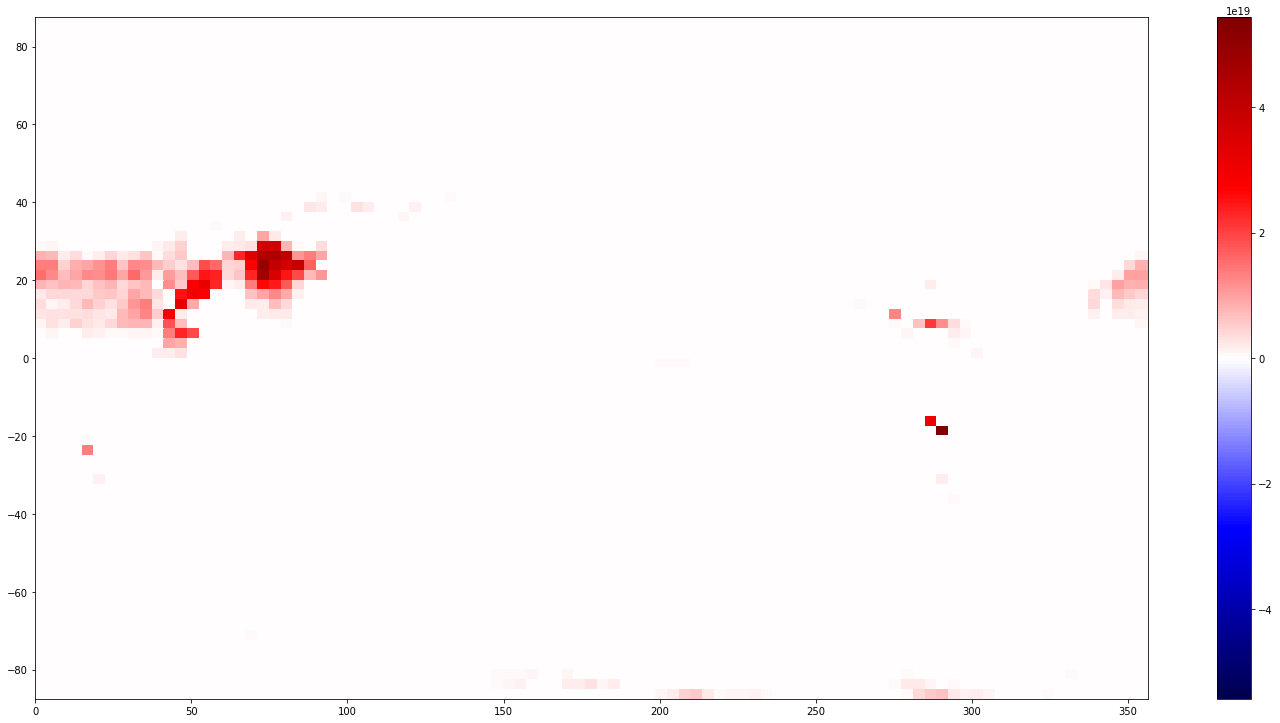

In [111]:
plot_map(lat, long, df_monthly.loc[0].values.reshape(71,96))

In [114]:
ar2 = df_monthly.values

In [115]:
for i in range(len(ar2)):
    for j in range(len(ar2[0])):
        if ar2[i][j]>100:
            ar2[i][j] = np.nan

In [159]:
ar3 = pd.DataFrame(ar2).loc[1].values.reshape(71,96)

amin = np.nanmin(ar3)
amax = np.nanmax(ar3)

amin

plt.pcolor(long, lat, pd.DataFrame(ar2).loc[1].values.reshape(71,96), 
           cmap='seismic', vmax=max(abs(amin), abs(amax)), vmin=(-1)*max(abs(amin), abs(amax)))
plt.tight_layout()
cbar = plt.colorbar()
plt.show()

In [171]:
df_ar = pd.DataFrame(ar2)

In [195]:
df_std = pd.DataFrame(np.sqrt(df_ar.var(skipna=True, axis=0).values).reshape(71,96))

df_std

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,8.316058,8.337643,8.379280,8.443915,8.486062,8.524583,8.566144,8.628578,8.662476,8.726027,...,8.885253,8.807988,8.583137,8.349597,8.344486,8.381193,8.329512,8.277314,8.234429,8.272771
1,6.689056,6.578056,6.517907,6.539838,6.604460,6.654880,6.718919,6.826064,6.916741,7.040770,...,9.040965,8.598751,8.505985,7.659059,7.443100,7.611701,7.500583,7.306560,7.035406,6.850979
2,4.920920,4.645769,4.465588,4.443998,4.528264,4.625660,4.715230,4.918597,5.155815,5.377396,...,9.057563,7.748431,6.801574,7.060112,7.334460,6.919803,6.685176,6.336249,5.793270,5.304632
3,3.678604,3.572991,3.565096,3.570359,3.664241,3.801379,3.806916,3.933152,4.082680,4.308496,...,8.590179,8.412891,7.650242,6.923123,6.122584,5.788964,5.444739,5.003546,4.399293,3.964719
4,3.104466,3.199058,3.268946,3.302139,3.296085,3.306635,3.356932,3.400911,3.519838,3.812600,...,8.269808,8.433563,8.063273,7.582729,4.763549,5.858537,4.791549,3.937744,3.313661,3.165900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,8.375165,8.279755,8.371116,8.952235,9.394024,9.309595,8.958487,8.969167,9.485151,9.845792,...,7.548379,7.462191,6.600594,3.944788,5.850832,5.456693,6.397382,6.940938,7.650132,8.026556
67,9.403618,9.452955,9.050831,9.133667,9.429766,9.786317,10.133400,10.337651,10.478516,10.375889,...,8.898145,8.633813,3.282620,2.900334,6.891411,6.991652,7.154460,7.821842,8.570226,9.121570
68,9.431732,9.940825,10.358196,10.649324,10.804424,10.634490,10.308560,10.000756,9.717529,9.415632,...,8.164744,7.197712,6.595819,6.327991,6.376229,7.063190,6.197342,7.357300,7.845308,8.673978
69,9.412258,9.826534,10.125712,10.251999,10.406607,10.572892,10.666822,10.622672,10.493737,10.417254,...,7.115934,8.101659,7.962897,8.123940,8.411075,8.059435,8.164455,8.227768,8.498743,8.918186


In [197]:
amin = np.nanmin(df_std.values)
amax = np.nanmax(df_std.values)
amax

13.510238713876726

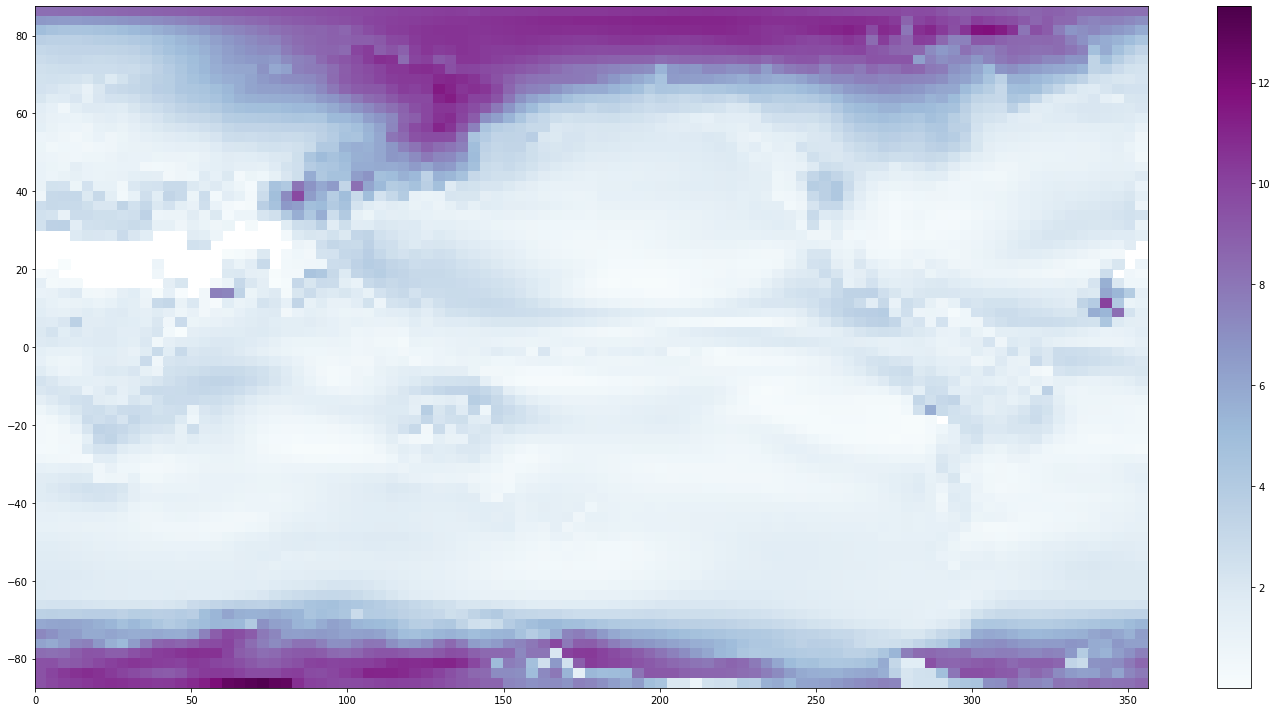

In [194]:
plt.pcolor(long, lat, df_std.values, 
           cmap='BuPu', vmax=amax, vmin=amin)
plt.tight_layout()
cbar = plt.colorbar()
plt.show()

In [196]:
file = open("monthly_std.txt", "w")
dump = "\n".join(df_std.values.reshape(71*96).astype(str).tolist())
file.write(dump)

125367